<a href="https://colab.research.google.com/github/johyunkang/py_pandas/blob/main/python_ml_perfect_guide_05_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 회귀 (Regression )
### 03 비용 최소화 하기 - 경사 하강법 (Gradient Descent) 소개


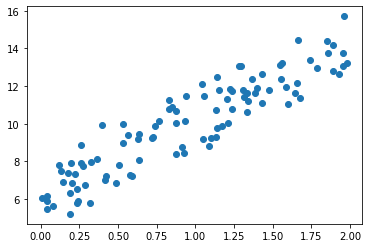

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y = 4X + 6 을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦
x = 2 * np.random.rand(100, 1)
y = 6 + 4 * x + np.random.randn(100, 1)

# x, y 데이터 세트 산점도로 시각화
plt.scatter(x, y)
# 아래 시각화 데이터는 y = 4x + 6 을 중심으로 무작위로 퍼져 있음

#### 비용함수 정의
비용함수 get_cost()는 실제 y 값과 예측된 y 값을 인자로 받아서 아래 수식으로 계산해서 반환함.


$\dfrac{1}{N} \displaystyle \sum_{i=1}^N(실제값_i - 예측값_i)^2$

In [2]:
# 비용함수 정의
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

In [3]:
# w1과 w0을 업데이트 할 w1_update, w0_update 를 반환
def get_weight_updates(w1, w0, x, y, learning_rate=0.01) :
    N = len(y)

    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape 와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(x, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))

    # w1과 w0을 업데이트할 w1_update 와 w0_update 계산
    w1_update = -(2 / N) * learning_rate * (np.dot(x.T, diff))
    w0_update = -(2 / N) * learning_rate * (np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [4]:
# 입력인자 iters 로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함
def gradient_descent_steps(x, y, iters=10000) :
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters) :
        w1_update, w0_update = get_weight_updates(w1, w0, x, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [5]:
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

w1, w0 = gradient_descent_steps(x, y, iters=1000)
print('w1:{0:.4f} , w0:{1:.4f}'.format(w1[0, 0], w0[0, 0]))

y_pred = w1[0, 0] * x + w0
print('Gradient Descent Total cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.0218 , w0:6.1620
Gradient Descent Total cost:0.9935


실제 선형식인 y = 4X + 6 과 유사하게 w1d은 4.022, w0는 6.162 가 도출되었음. 

예측 오류 비용은 0.9935 

앞에서 구한 y_pred 에 기반해 회귀선을 그려 보겠음

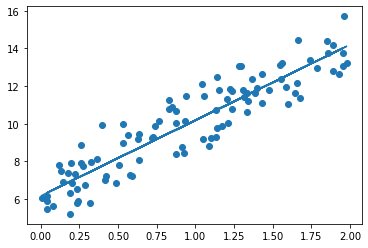

In [6]:
plt.scatter(x, y)
plt.plot(x, y_pred)

#### (미니 배치) 확률적 경사 하강법 (stochastic_gradient_descent_steps())

In [7]:
def stochastic_gradient_descent_stpes(x, y, batch_size=10, iters=1000) :
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    prev_cost = 100000
    itr_index = 0

    for ind in range(iters) :
        np.random.seed(ind)

        # 전체 x, y 데이터에서 랜덤하게 batch_size 만큼 데이터를 추출해 sample_x, sample_y 로 저장
        # permutation(x) 는 x 로 받은 값을 shuffle (섞어서) 반환. 입력변수 자체는 섞지 않음. return 값만 섞음
        stochastic_random_index = np.random.permutation(x.shape[0])
        sample_x = x[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        # 랜덤하게 batch_size 만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_x, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0


                                                  

In [8]:
w1, w0 = stochastic_gradient_descent_stpes(x, y, iters=1000)
print('w1:', round(w1[0, 0], 3), ', w0:', round(w0[0, 0], 3))

y_pred = w1[0, 0] * x + w0
print('Stochastic Gradient Descent total cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 , w0: 6.156
Stochastic Gradient Descent total cost:0.9937


#### 사이킷런 LinearRegression을 이용한 보스턴 주택가격 예측

회귀의 성능을 평가하는 지표
- MAE : Mean Absolute Error (MAE)이며 실제 값과 예측값의 차이를 절대값으로 변환해 평균한 것  
$MAE = \dfrac{1}{n} \displaystyle \sum_{i=1}^n|Yi - \hat{Y}i|$

- MSE : Mean Squared Error (MSE)이며 실제 값과 예측값의 차이를 제곱해 평균한 것  
$MSE = \dfrac{1}{n}\displaystyle \sum_{i=1}^n{(Yi - \hat{Y}i)^2}$

- RMSE : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것이 RMSE(Root Mean Squared Error)임  
(아래 수식의 root는 모든 값에 해당)  
$RMSE = \displaystyle \sqrt{\dfrac{1}{n}}\sum_{i=1}^n{(Yi - \hat{Y}i)^2}$

- $R^2$ : 분산 기반으로 예측 성능을 평가합니다. 실제 값으 ㅣ분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높습니다.  
$R^2 = \dfrac{예측값Variance}{실제값Variance}$

**보스턴 주택가격 데이터 피처설명**
- CRIM : 지역별 범죄 발생률
- ZN : 25,000평방피트를 초과하는 거주 지역의 비율
- INDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX : 일산화 질소 농도
- RM : 거주할 수 있는 방 개수
- AGE : 1940년 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중 거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000달러당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
- MEDV : 본인 소유의 주택 가격(중앙값)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DF 변환
df = pd.DataFrame(boston.data, columns = boston.feature_names)
# df.head()

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 컬럼으로 DF에 추가함
df['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', df.shape)
print('info:', df.info())
df.head()

Boston 데이터 세트 크기: (506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
info: None


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


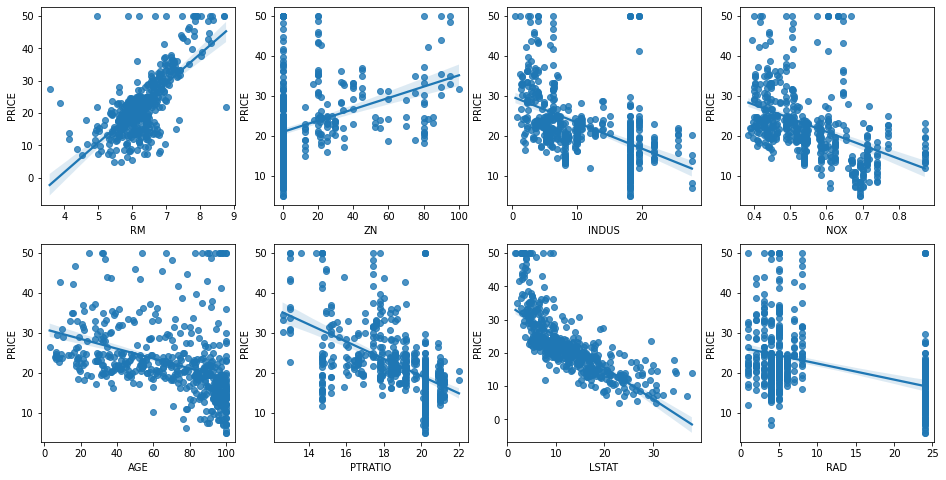

In [10]:
# 각 컬럼이 회귀 결과에 미치는 영향 파악
# ZN, INDUS, NOX, AGE, PTRATIO, LSTAT, RAD 총 8개 컬럼이 증가할 수록 PRICE 값에 어떤 영향을 미치는지 확인
# subplots() 는 여러개의 그래프를 한번에 표현
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs 는 4x2 개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features) :
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

In [11]:
# LinearRegression 클래스를 이용해 보스턴 주택가격 회귀모델 만들기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = df['PRICE']
x_data = df.drop(['PRICE'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS(Ordinary Least Squares)로 학습 / 예측 / 평가 수행
lr = LinearRegression()
lr.fit(x_train, y_train)
y_preds = lr.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.4f}, RMSE:{1:.4f}'.format(mse, rmse))
print('Variance score:{0:.4f}'.format(r2_score(y_test, y_preds)))
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))
# 회귀 계수값(coef_)은 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 맵핑 후, 높은 순으로 출력

MSE:17.2969, RMSE:4.1590
Variance score:0.7572
절편 값: 40.995595172164755
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [12]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=x_data.columns)
coeff.sort_values(ascending=False)
# NOX의 -19.8은 마이너스(-) 값이 너무 크다. 최적화 수행 필요

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [17]:
from sklearn.model_selection import cross_val_score

y_target  = df['PRICE']
x_data = df.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring='neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모든 음수
print('5 folds 의 개별 Negative MSE Scores:', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE Scores:', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE:{0:.4f}'.format(avg_rmse))


5 folds 의 개별 Negative MSE Scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE Scores: [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE:5.8287


### 05 다항 회귀와 과(대)적합/과소적합 이해
다항 회귀 이해

회귀에서 선형 회귀/비선형 회귀를 나누는 기준은 **회귀 계수가 선형 / 비선형**인지에 따름.  
(독립변수의 선형 / 비선형 여부와는 무관함)

사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않음.  
대신 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현.


이를 위해 사이킷런은 PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환함.

In [19]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]]의 2X2 행렬 생성
x = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처:\n', x)

# degree=2 인  2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(x)
poly_ftr = poly.transform(x)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


단항 계수 피처 [$x_1, x_2$]를 2차 다항 계수 [$1,  x_1,  x_2,  x_1^2,  x_1x_2,  x_2^2$]로 변경하므로   
첫 번째 입력 단항 계수 피처 [$x_1 = 0, x_2 = 1$]은 [$1, x_1=0, x_2=1, x_1^2 = 0, x_1x_2 = 0, x_2^2=0$] 형태인 [1, 0, 1, 0, 0, 1]로 변환됨.

------
3차 다항 회귀의 결정 함수식은 다음과 같음.  
$y = 1 + 2x_1 + 3x_1^2 + 4x_2^3$  로 설정하고  
이를 위한 함수 polynomial_func()를 만듦.

In [22]:
def polynomial_func(x) :
    y = 1 + 2*x[:, 0] + 3*x[:, 0]**2 + 4*x[:, 1]**3
    return y

x = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 features:\n', x)
y = polynomial_func(x)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 features:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


PolynomialFeatures(degree=3) 은 단항 계수 피처 [$x_1, x_2$] 를   
3차 다항 계수 [$1, x_1, x_2, x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3$] 과 같이 10개의 다항 계수로 변환함.

In [25]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(x)
print('3차 다항 계수 features:\n', poly_ftr)

# LinearRegression 에 3차 다항식 계수 features와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수:\n', np.round(model.coef_, 2))
print('\nPolyNomial 회귀 shape:', model.coef_.shape)

3차 다항 계수 features:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]

PolyNomial 회귀 shape: (10,)


#### Pipeline 객체 이용해 한 번에 다항 회귀를 구현

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(x) :
    y = 1 + 2*x[:, 0] + 3*x[:, 0]**2 + 4*x[:, 1]**3
    return y


# pipeline 객체로 Streamline 하게 Polynomial Feature 변환과 LinearRegression 을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
x = np.arange(4).reshape(2, 2)
y = polynomial_func(x)

model = model.fit(x, y)

print('Polynomial 회귀 계수:\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
